### Machine Learning : Classification

In [1]:
#Extracting Dataset
#EDA
#Data Cleaning
#ML Algos

#A. Supervised ML
#a. Regression.   

#1. Linear regression
#Regularization #Feature Selection
#Lasso
#Ridge
#Softnet

#b. Classification

#1. Logistic 
#2 Decisin Tree
# Random Forest

#Hyperparameter Tuning
#Feature Reduction.  A. Linaer Discriminant Analysis[LDA]  B. Principal Component Analysis[PCA]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Extracting Dataset
df = pd.read_csv('loan_data.csv')

In [4]:
#EDA
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
# 1. Check Data.
df.shape

(45000, 14)

In [6]:
# 2. Data Types of features.
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [7]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [9]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [11]:
# Exploratory Data Analysis : 

# 1. Check Data.
# 2. Data Types of features.
# 3. Numerical : Statistical Analysis  :    Note Observations.

# 4. Identify Categorical Features.    and Value count it. 
# 5. Identify each Category wise   : loan_status.
# 6. Identify each category wise   : loan_amount

# 7. Correlation wrt loan_status.         Idenify 3 highly correlated features.
# 8. median loan_interest_rates             :   for each   category.

# Data Cleaning  : 

# Null Values
# Preprocessing : 

# Categorical Data  : LabelEncoder

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [13]:
# 3. Numerical : Statistical Analysis  :    Note Observations.
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [14]:
a= df['person_age'].astype(int)

<AxesSubplot:>

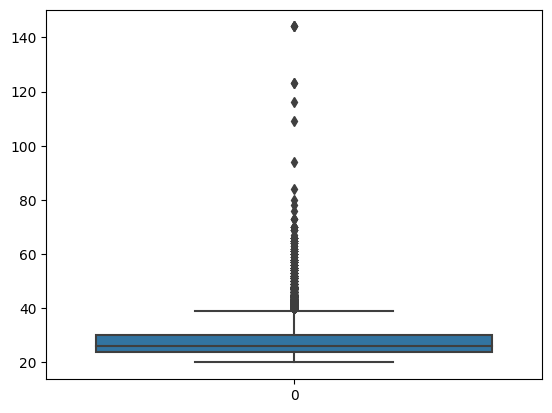

In [15]:
sns.boxplot(a)

In [16]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [17]:
# 4. Identify Categorical Features.    and Value count it. 
cat = [] 

for i in df:
    if len(df[i].unique()) < 7:
        cat.append(i) 


In [18]:
cat

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

In [19]:

for i in cat:
    print(df[i].value_counts())
    print('_____________________')
    print()

male      24841
female    20159
Name: person_gender, dtype: int64
_____________________

Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: person_education, dtype: int64
_____________________

RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: person_home_ownership, dtype: int64
_____________________

EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: loan_intent, dtype: int64
_____________________

Yes    22858
No     22142
Name: previous_loan_defaults_on_file, dtype: int64
_____________________

0    35000
1    10000
Name: loan_status, dtype: int64
_____________________



In [20]:
for i in cat:
    print(round(df[i].value_counts(normalize=True)*100))
    print('_____________________')
    print()

male      55.0
female    45.0
Name: person_gender, dtype: float64
_____________________

Bachelor       30.0
Associate      27.0
High School    27.0
Master         16.0
Doctorate       1.0
Name: person_education, dtype: float64
_____________________

RENT        52.0
MORTGAGE    41.0
OWN          7.0
OTHER        0.0
Name: person_home_ownership, dtype: float64
_____________________

EDUCATION            20.0
MEDICAL              19.0
VENTURE              17.0
PERSONAL             17.0
DEBTCONSOLIDATION    16.0
HOMEIMPROVEMENT      11.0
Name: loan_intent, dtype: float64
_____________________

Yes    51.0
No     49.0
Name: previous_loan_defaults_on_file, dtype: float64
_____________________

0    78.0
1    22.0
Name: loan_status, dtype: float64
_____________________



In [21]:
# 5. Identify each Category wise   : loan_status.
for i in cat:
    print(df.groupby(i)['loan_status'].value_counts().unstack())
    print('_____________________________________________')
    print()

loan_status        0     1
person_gender             
female         15674  4485
male           19326  5515
_____________________________________________

loan_status           0     1
person_education             
Associate          9378  2650
Bachelor          10381  3018
Doctorate           479   142
High School        9301  2671
Master             5461  1519
_____________________________________________

loan_status                0     1
person_home_ownership             
MORTGAGE               16345  2144
OTHER                     78    39
OWN                     2729   222
RENT                   15848  7595
_____________________________________________

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  4982  2163
EDUCATION          7601  1552
HOMEIMPROVEMENT    3525  1258
MEDICAL            6170  2378
PERSONAL           6031  1521
VENTURE            6691  1128
_____________________________________________

loan_status                           0     

# 6. Identify each category wise   : loan_amount
for i in cat:
    a = df['loan_amnt'].median()
    print(df.groupby(i)[a].value_counts().unstack())
    print('_____________________________________________')
    print()

In [22]:
for i in cat:
    print(f"Medians of loan amount grouped by '{i}':")
    print(df.groupby(i)['loan_amnt'].median())
    print('_____________________________________________\n')


Medians of loan amount grouped by 'person_gender':
person_gender
female    8000.0
male      8000.0
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'person_education':
person_education
Associate      8000.0
Bachelor       8000.0
Doctorate      8400.0
High School    8000.0
Master         8000.0
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'person_home_ownership':
person_home_ownership
MORTGAGE     9600.0
OTHER       10000.0
OWN          7500.0
RENT         7500.0
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'loan_intent':
loan_intent
DEBTCONSOLIDATION    8000.0
EDUCATION            8000.0
HOMEIMPROVEMENT      9000.0
MEDICAL              7846.0
PERSONAL             8000.0
VENTURE              8000.0
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loa

In [23]:
for i in cat:
    print(f"Medians of loan amount grouped by '{i}':")
    print(df.groupby(i)['loan_amnt'].mean())
    print('_____________________________________________\n')


Medians of loan amount grouped by 'person_gender':
person_gender
female    9508.525770
male      9643.722837
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'person_education':
person_education
Associate      9627.988942
Bachelor       9556.113068
Doctorate      9930.932367
High School    9543.422987
Master         9595.030229
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'person_home_ownership':
person_home_ownership
MORTGAGE    10716.832225
OTHER       11282.324786
OWN          8980.320230
RENT         8756.457023
Name: loan_amnt, dtype: float64
_____________________________________________

Medians of loan amount grouped by 'loan_intent':
loan_intent
DEBTCONSOLIDATION     9548.333660
EDUCATION             9507.405987
HOMEIMPROVEMENT      10419.187330
MEDICAL               9137.959172
PERSONAL              9603.918432
VENTURE               9658.897429
Na

In [24]:
df.select_dtypes(exclude = 'object').corr().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.00,0.19,0.95,0.05,0.01,-0.04,0.86,0.18,-0.02
person_income,0.19,1.00,0.19,0.24,0.00,-0.23,0.12,0.04,-0.14
person_emp_exp,0.95,0.19,1.00,0.04,0.02,-0.04,0.82,0.19,-0.02
loan_amnt,0.05,0.24,0.04,1.00,0.15,0.59,0.04,0.01,0.11
loan_int_rate,0.01,0.00,0.02,0.15,1.00,0.13,0.02,0.01,0.33
loan_percent_income,-0.04,-0.23,-0.04,0.59,0.13,1.00,-0.03,-0.01,0.38
cb_person_cred_hist_length,0.86,0.12,0.82,0.04,0.02,-0.03,1.00,0.16,-0.01
credit_score,0.18,0.04,0.19,0.01,0.01,-0.01,0.16,1.00,-0.01
loan_status,-0.02,-0.14,-0.02,0.11,0.33,0.38,-0.01,-0.01,1.00


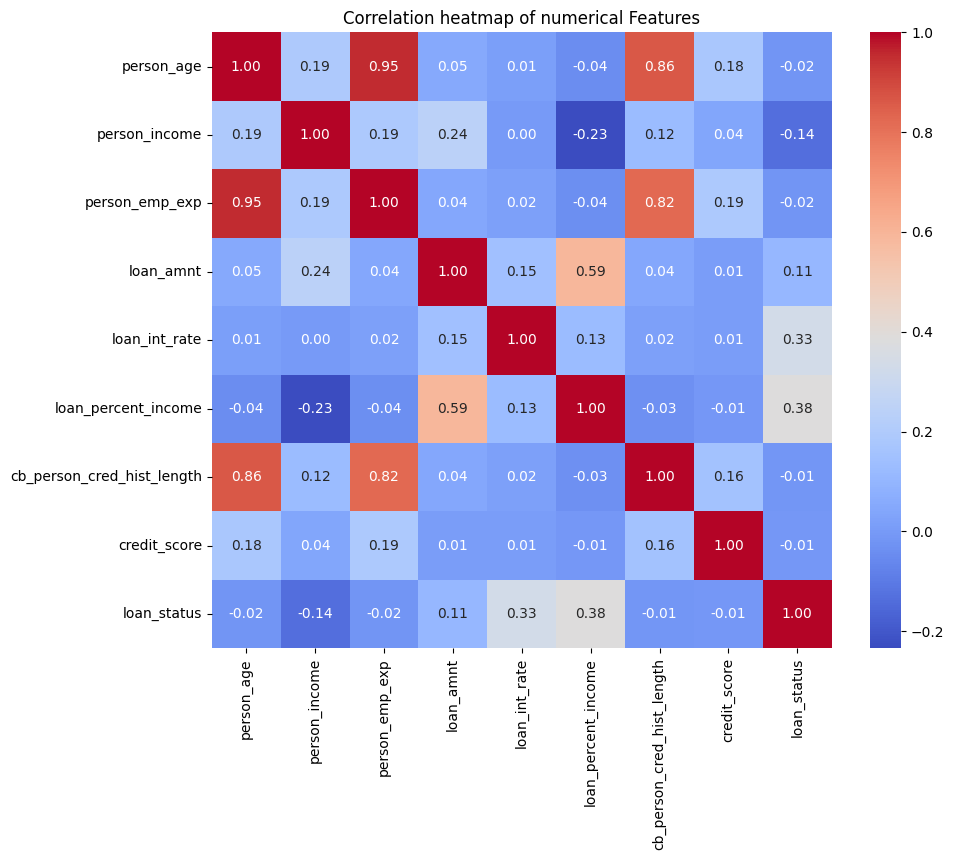

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap of numerical Features")
plt.show()


In [26]:
df.duplicated().sum()

0

In [27]:
np.sum(df['person_age'] > 70)

15

In [28]:
df[df['person_age'] > 70]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32381,73.0,female,Bachelor,51415.0,47,MORTGAGE,5000.0,PERSONAL,7.49,0.10,28.0,706,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32432,73.0,male,Bachelor,90678.0,47,RENT,7800.0,MEDICAL,11.01,0.09,24.0,696,Yes,0


In [29]:
df.shape

(45000, 14)

In [30]:
df1 = df[df['person_age'] < 70]
df1.shape

(44978, 14)

In [31]:
df1.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44978.00,44978.00,44978.00,44978.00,44978.00,44978.00,44978.00,44978.00,44978.00
mean,27.73,79912.69,5.38,9583.94,11.01,0.14,5.86,632.56,0.22
std,5.85,63329.33,5.86,6315.22,2.98,0.09,3.86,50.39,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47192.75,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67047.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95782.75,8.00,12237.75,12.99,0.19,8.00,670.00,0.00
max,69.00,2448661.00,49.00,35000.00,20.00,0.66,30.00,784.00,1.00


In [32]:
#Preprocessing 
#Catagorical Data  : Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [33]:
df1.select_dtypes(include = 'object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [34]:
for i in cat :
    df1[i] = LE.fit_transform(df1[i])

In [35]:
df1.shape

(44978, 14)

In [36]:
df1

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [37]:
x = df1.drop('loan_status', axis = 1)
y = df1['loan_status']

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
x_train, x_rem, y_train, y_rem = tts(x, y, train_size = .70,random_state=123)

In [40]:
x_val, x_test, y_val, y_test = tts(x_rem, y_rem, test_size=.50,random_state = 123)

In [41]:
x_val.shape, x_test.shape, y_val.shape, y_test.shape

((6747, 13), (6747, 13), (6747,), (6747,))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [44]:
print('accuracy Score : ', accuracy_score(y_train,LR.predict(x_train))*100)
print('accuracy Score : ', accuracy_score(y_test,LR.predict(x_test))*100)

accuracy Score :  82.57845254732563
accuracy Score :  83.01467318808359


In [45]:
print(classification_report(y_test,LR.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5233
           1       0.70      0.42      0.53      1514

    accuracy                           0.83      6747
   macro avg       0.78      0.68      0.71      6747
weighted avg       0.82      0.83      0.81      6747



In [46]:
#hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV as gv

param = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'newton-cholesky', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 300, 500, 700, 1000, 2000],
    'multi_class': ['auto', 'ovr', 'multinomial']
}


In [48]:
#ht = gv(LR , param)

In [49]:
#ht.fit(x_train, y_train)

In [50]:
#ht.best_params_

In [51]:
{'max_iter': 100,
 'multi_class': 'auto',
 'penalty': None,
 'solver': 'newton-cholesky'}

{'max_iter': 100,
 'multi_class': 'auto',
 'penalty': None,
 'solver': 'newton-cholesky'}

In [52]:
#ht.best_score_

In [53]:
print('accuracy Score : ', accuracy_score(y_train,LR.predict(x_train))*100)
print('accuracy Score : ', accuracy_score(y_test,LR.predict(x_test))*100)

accuracy Score :  82.57845254732563
accuracy Score :  83.01467318808359


In [54]:
LR1 = LogisticRegression(max_iter=100,multi_class= "auto", penalty = 'none' , solver="newton-cg")
LR1.fit(x_train, y_train)
print("Accuracy Score Training   : ", accuracy_score(y_train, LR1.predict(x_train) ) * 100 )
print("Accuracy Score Testing    : ", accuracy_score(y_test,  LR1.predict(x_test)  ) * 100 )

Accuracy Score Training   :  88.48303900393852
Accuracy Score Testing    :  88.79502000889285


In [55]:
LR1 = LogisticRegression(max_iter=700,multi_class= "ovr", penalty = 'l1' , solver="liblinear")
model = LR1.fit(x_train, y_train)
print("Accuracy Score Training   : ", accuracy_score(y_train, LR1.predict(x_train) ) * 100 )
print("Accuracy Score Testing    : ", accuracy_score(y_test,  LR1.predict(x_test)  ) * 100 )

Accuracy Score Training   :  89.06111040528522
Accuracy Score Testing    :  89.1951978657181


In [56]:
import joblib


# Train the model (use your actual training data here)
# model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'logistic_model1.pkl')


['logistic_model1.pkl']

In [57]:
import pickle

# Save the trained model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [58]:
import joblib

# Load the saved model
model = joblib.load('logistic_model.pkl')

# Check the model type
print(type(model))  # It should print something like: <class 'sklearn.linear_model._logistic.LogisticRegression'>


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
# Get the feature coefficients from the logistic regression model
coefficients = model.coef_[0]  # shape (1, n_features)
features = x.columns  # the list of feature names (same as the columns in your input data)

# Create a DataFrame to show each feature and its coefficient
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficient (highest to lowest)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coeff_df)


In [ ]:
# Import necessary libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('logistic_model.pkl')

# Define the feature names used for training the model
features = ['person_age', 'person_gender', 'person_education', 'person_income', 
            'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
            'credit_score', 'previous_loan_defaults_on_file']

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame for coefficients and feature names
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Add a column for the absolute value of the coefficients
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Normalize the coefficients to calculate percentage importance
total_abs_coeff = coeff_df['Abs_Coefficient'].sum()
coeff_df['Percentage_Importance'] = (coeff_df['Abs_Coefficient'] / total_abs_coeff) * 100

# Sort by percentage importance
coeff_df = coeff_df.sort_values(by='Percentage_Importance', ascending=False)

# Display the DataFrame
coeff_df

# Optionally, plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Percentage_Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # To show the most important feature on top
plt.show()
